In [1]:
cd ../aclImdb

/Users/jlc/Google Drive/_code/MIDS_W266/BERT_Imdb/aclImdb


---  
  
# Imdb EDA  
  
---  

The core dataset contains 50,000 reviews split evenly into 25k train
and 25k test sets. The overall distribution of labels is balanced (25k
pos and 25k neg). We also include an additional 50,000 unlabeled
documents for unsupervised learning. 

In the entire collection, no more than 30 reviews are allowed for any
given movie because reviews for the same movie tend to have correlated
ratings. Further, the train and test sets contain a disjoint set of
movies, so no significant performance is obtained by memorizing
movie-unique terms and their associated with observed labels.  In the
labeled train/test sets, a negative review has a score <= 4 out of 10,
and a positive review has a score >= 7 out of 10. Thus reviews with
more neutral ratings are not included in the train/test sets. In the
unsupervised set, reviews of any rating are included and there are an
even number of reviews > 5 and <= 5.


In [2]:
import pandas as pd
import os

## Initial exploration

### number of reviews

In [3]:
train_pos_list = pd.read_csv('train/urls_pos.txt', header=None, names=['URL'])
train_neg_list = pd.read_csv('train/urls_neg.txt', header=None, names=['URL'])
test_pos_list  = pd.read_csv('test/urls_pos.txt', header=None, names=['URL'])
test_neg_list  = pd.read_csv('test/urls_neg.txt', header=None, names=['URL'])

In [4]:
pd.DataFrame.from_dict(data={'train_pos' : train_pos_list.count().values[0], 
                             'train_neg' : train_neg_list.count().values[0],
                             'test_pos' : test_pos_list.count().values[0], 
                             'test_neg' : test_neg_list.count().values[0]
                             }, orient='index').T


,train_pos,train_neg,test_pos,test_neg
0,12500,12500,12500,12500


### unique movies are included

In [5]:
train_pos_list['movie_ID'] = train_pos_list['URL'].str[26:35]
train_neg_list['movie_ID'] = train_neg_list['URL'].str[26:35]
test_pos_list['movie_ID']  = test_pos_list['URL'].str[26:35]
test_neg_list['movie_ID']  = test_neg_list['URL'].str[26:35]

In [6]:
pd.DataFrame.from_dict(data={'train_pos' : len(train_pos_list['movie_ID'].unique()), 
                             'train_neg' : len(train_neg_list['movie_ID'].unique()), 
                             'test_pos' : len(test_pos_list['movie_ID'].unique()), 
                             'test_neg' : len(test_neg_list['movie_ID'].unique()), 
                             }, orient='index').T

,train_pos,train_neg,test_pos,test_neg
0,1390,2957,1351,3016


The data set seems to be relatively balanced in unique reviews. 

#### Reviews about the same movie

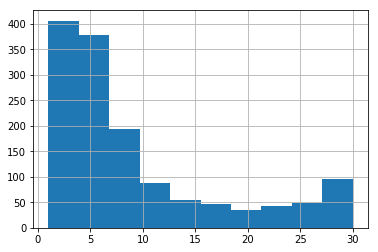

In [15]:
train_pos_list.groupby('movie_ID',).count()['URL'].hist()

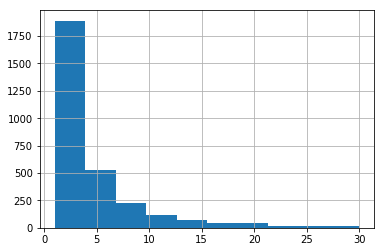

In [16]:
train_neg_list.groupby('movie_ID',).count()['URL'].hist()

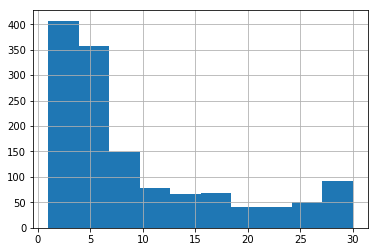

In [17]:
test_pos_list.groupby('movie_ID',).count()['URL'].hist()

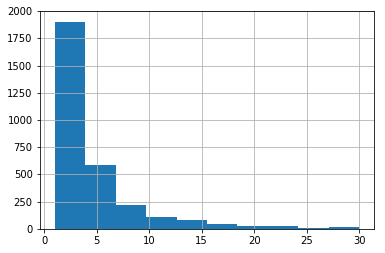

In [18]:
test_neg_list.groupby('movie_ID',).count()['URL'].hist()

There are more cases of 'muliple reviews' in the positive groups of both the training and the dataset. 

### Length of each review

In [19]:
def get_wordtotals(data_dir):
    
    def extract_tots(file):
        words, num_words = 0,0
        for line in file:
            words = line.split()
            num_words += len(words)
            return num_words
    
    pos_files = os.listdir(os.path.join(data_dir, 'pos'))
    neg_files = os.listdir(os.path.join(data_dir, 'neg'))
        
    data = []
    for pos_file, neg_file in zip(pos_files, neg_files):
        with open(os.path.join(data_dir, 'pos', pos_file)) as f:   
            data.append((extract_tots(f), 1))
        with open(os.path.join(data_dir, 'neg', neg_file)) as f:
            data.append((extract_tots(f), 0))
    
    return data

In [20]:
dir_train = '/Users/jlc/Google Drive/_code/MIDS_W266/BERT_Imdb/aclImdb/train/'
dir_test  = '/Users/jlc/Google Drive/_code/MIDS_W266/BERT_Imdb/aclImdb/test/'

word_totals_train = pd.DataFrame(get_wordtotals(dir_train), columns=['words','pos'])
word_totals_train['type'] = 'train'
word_totals_test = pd.DataFrame(get_wordtotals(dir_test), columns=['words','pos'])
word_totals_test['type'] = 'test'

In [21]:
word_lengths = pd.concat([word_totals_train, word_totals_test])
word_lengths.head()

,words,pos,type
0,52,1,train
1,41,0,train
2,166,1,train
3,188,0,train
4,55,1,train


#### Training set

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

In [23]:
word_lengths[word_lengths.type=='train'].words.describe()

count    25000.000000
mean       233.787200
std        173.733032
min         10.000000
25%        127.000000
50%        174.000000
75%        284.000000
max       2470.000000
Name: words, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


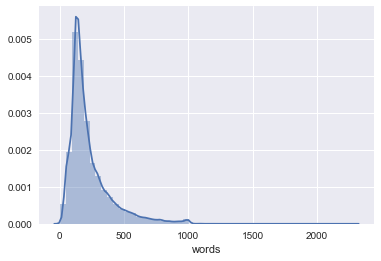

In [24]:
sns.distplot(word_lengths[word_lengths.type=='test'].words)

#### Test set

In [25]:
word_lengths[word_lengths.type=='train'].words.describe()

count    25000.000000
mean       233.787200
std        173.733032
min         10.000000
25%        127.000000
50%        174.000000
75%        284.000000
max       2470.000000
Name: words, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


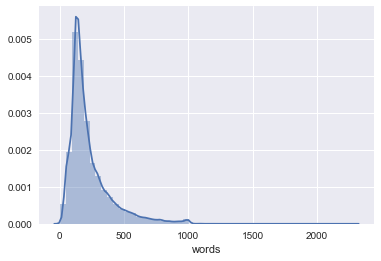

In [26]:
sns.distplot(word_lengths[word_lengths.type=='test'].words)

#### Comparison

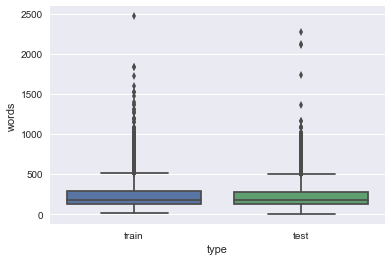

In [27]:
# training vs test set, review length
ax = sns.boxplot(x="type", y="words", data=word_lengths)

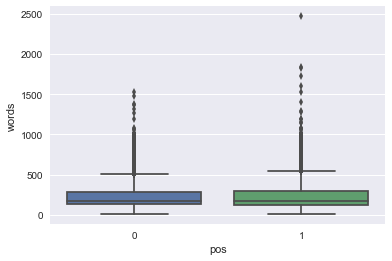

In [28]:
# pos vs neg reviews; training set
ax = sns.boxplot(x="pos", y="words", data=word_lengths[word_lengths.type=='train'])

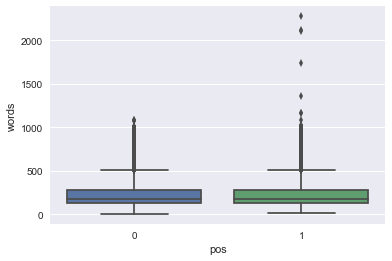

In [29]:
# pos vs neg reviews; test set
ax = sns.boxplot(x="pos", y="words", data=word_lengths[word_lengths.type=='test'])

The training and test sets appear to be well balanced in distribution, both in pos/neg split and in review length.